In [1]:
# Importing libraries for data loading, basic data pre processing and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset

df_train_raw = pd.read_csv('train.csv', sep=',', header=None, encoding = "ISO-8859-1")
df_train_raw.columns = ["polarity", "id", "date", "query", "user", "text"]
df_train_raw.head()

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
# Getting info about the dataset to see if there are any null values and checking the datatype of each column

df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   polarity  1600000 non-null  int64 
 1   id        1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   query     1600000 non-null  object
 4   user      1600000 non-null  object
 5   text      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [4]:
# Having a look at the number of Positive and Negative sentiments

df_train_raw['polarity'].value_counts()

0    800000
4    800000
Name: polarity, dtype: int64

In [5]:
# Extracting only the required columns from the original dataset

df_train = df_train_raw[['polarity', 'text']]
df_train.head()

,polarity,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


### As we did not have enough computing resources, we decided to only use half of the original dataset for the purpose of the project

In [6]:
# As we saw above, the dataset is balanced perfectly. Hence we decided to use half of the positive and negative sentiments.

p = df_train[df_train['polarity'] == 4]
n = df_train[df_train['polarity'] == 0]
print(len(p), len(n))

800000 800000


In [7]:
# Checking to see if we got the split correct

p = p.iloc[:int(len(p)/2)]
n = n.iloc[:int(len(n)/2)]
print(len(p), len(n))

400000 400000


In [8]:
# Combining them into a single dataframe again.

df_train = pd.concat([p, n])
len(df_train)

800000

### Data Cleaning

In [9]:
# Importing Tweet Tokenizer and creating an instance of it. 

from nltk.tokenize import TweetTokenizer
token = TweetTokenizer(reduce_len=True)

In [10]:
# Creating a data array and extracting the values from the dataframe.

data = []
tweet = df_train['text'].tolist()
sentiment = df_train['polarity'].tolist()

In [11]:
# Re-Assigning the sentiment values # 0 - Negative, 1 - Positive

for i, j in zip(tweet, sentiment):
    if j == 4:
        data.append((token.tokenize(i), 1))
    else:
        data.append((token.tokenize(i), 0))

In [12]:
# Importing the Regular Expressions and String libraries

import re, string

In [13]:
# Creating a funtion to replace some of the commonly used slangs while tweeting

def slang_replace(tk):
    if tk == 'u':
        return 'you'
    if tk == 'r':
        return 'are'
    if tk == 'some1':
        return 'someone'
    if tk == 'yrs':
        return 'years'
    if tk == 'hrs':
        return 'hours'
    if tk == 'mins':
        return 'minutes'
    if tk == 'secs':
        return 'seconds'
    if tk == 'pls' or tk == 'plz':
        return 'please'
    if tk == '2morow' or tk == '2moro':
        return 'tomorrow'
    if tk == '2day':
        return 'today'
    if tk == '4got' or tk == '4gotten':
        return 'forget'
    if tk in ['hahah', 'hahaha', 'hahahaha']:
        return 'haha'
    if tk == "mother's":
        return "mother"
    if tk == "mom's":
        return "mom"
    if tk == "dad's":
        return "dad"
    if tk == 'bday' or tk == 'b-day':
        return 'birthday'
    if tk in ["i'm", "don't", "can't", "couldn't", "aren't", "wouldn't", "isn't", "didn't", "hadn't",
                 "doesn't", "won't", "haven't", "wasn't", "hasn't", "shouldn't", "ain't", "they've"]:
        return tk.replace("'", "")
    if tk in ['lmao', 'lolz', 'rofl']:
        return 'lol'
    if tk == '<3':
        return 'love'
    if tk == 'thanx' or tk == 'thnx':
        return 'thanks'
    if tk == 'goood':
        return 'good'
    if tk in ['amp', 'quot', 'lt', 'gt', '½25', '..', '. .', '. . .']:
        return ''
    return tk


In [14]:
# Creating a function to clean the links, mentions and replace some of the widely used short forms in English with their
# original words.

def clean_data(tt):

    clean_tks = []

    for tokens in tt:
        tokens = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", tokens)
        tokens = re.sub("(@[A-Za-z0-9_]+)","", tokens)
        
        cl_tk = slang_replace(tokens.lower())
        
        if cl_tk == "idk":
            clean_tks.append('i')
            clean_tks.append('dont')
            clean_tks.append('know')
            continue
        if cl_tk == "i'll":
            clean_tks.append('i')
            clean_tks.append('will')
            continue
        if cl_tk == "you'll":
            clean_tks.append('you')
            clean_tks.append('will')
            continue
        if cl_tk == "we'll":
            clean_tks.append('we')
            clean_tks.append('will')
            continue
        if cl_tk == "it'll":
            clean_tks.append('it')
            clean_tks.append('will')
            continue
        if cl_tk == "it's":
            clean_tks.append('it')
            clean_tks.append('is')
            continue
        if cl_tk == "i've":
            clean_tks.append('i')
            clean_tks.append('have')
            continue
        if cl_tk == "you've":
            clean_tks.append('you')
            clean_tks.append('have')
            continue
        if cl_tk == "we've":
            clean_tks.append('we')
            clean_tks.append('have')
            continue
        if cl_tk == "they've":
            clean_tks.append('they')
            clean_tks.append('have')
            continue
        if cl_tk == "you're":
            clean_tks.append('you')
            clean_tks.append('are')
            continue
        if cl_tk == "we're":
            clean_tks.append('we')
            clean_tks.append('are')
            continue
        if cl_tk == "they're":
            clean_tks.append('they')
            clean_tks.append('are')
            continue
        if cl_tk == "let's":
            clean_tks.append('let')
            clean_tks.append('us')
            continue
        if cl_tk == "she's":
            clean_tks.append('she')
            clean_tks.append('is')
            continue
        if cl_tk == "he's":
            clean_tks.append('he')
            clean_tks.append('is')
            continue
        if cl_tk == "that's":
            clean_tks.append('that')
            clean_tks.append('is')
            continue
        if cl_tk == "i'd":
            clean_tks.append('i')
            clean_tks.append('would')
            continue
        if cl_tk == "you'd":
            clean_tks.append('you')
            clean_tks.append('would')
            continue
        if cl_tk == "there's":
            clean_tks.append('there')
            clean_tks.append('is')
            continue
        if cl_tk == "what's":
            clean_tks.append('what')
            clean_tks.append('is')
            continue
        if cl_tk == "how's":
            clean_tks.append('how')
            clean_tks.append('is')
            continue
        if cl_tk == "who's":
            clean_tks.append('who')
            clean_tks.append('is')
            continue
        if cl_tk == "y'all" or cl_tk == "ya'll":
            clean_tks.append('you')
            clean_tks.append('all')
            continue

        if cl_tk.strip() and cl_tk not in string.punctuation: 
            clean_tks.append(cl_tk)
            
    return clean_tks


### Using GloVe

### The GloVe word embeddings have been downloaded from http://nlp.stanford.edu/data/glove.6B.zip

### The file glove.6B.50d.txt has been provided with this code file in the zip folder.

### Please keep the file in the same folder as this notebook

In [15]:
# Creating a function to load the glove data file.

def global_vec(file):
    with open(file, 'r', encoding="utf8") as fl:
        word_set = set()
        word_vec_map = {}
        for line in fl:
            line = line.strip().split()
            curr_word = line[0]
            word_set.add(curr_word)
            word_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_index = {}
        index_words = {}
        for w in sorted(word_set):
            words_index[w] = i
            index_words[i] = w
            i = i + 1
    return words_index, index_words, word_vec_map

In [16]:
# Reading the Glove file.

word_index, index_word, word_vec_map = global_vec('glove.6B.50d.txt')

In [17]:
# Creating lists for the set of unknown words 

unk = []
unk_final = []

In [18]:
# This function will be used as a final try to find the words in the embedding layer and will eliminate continously occuring
# instances of a character.

def last_word_embed(remain):
    result = ""
    previous = None
    for alpha in remain:
        if alpha == previous: continue
        previous = alpha
        result += alpha
    return result

In [19]:
# This function will convert the sentences to indices

def index_gen(sen_word, word_index, m_len, i):
    global a, b 
    indices = []
    for j, k in enumerate(sen_word):
        try:
            index = word_index[k]
        except:
            unk_final.append(k)
            k = last_word_embed(k)
            try:
                index = word_index[k]
            except:
                index = word_index['unk']
                unk.append(k)
        a[i, j] = index

In [20]:
# Creating a list to store our cleaned tokens

clean_token = []
   
for tn, sentiment in data:
    z = clean_data(tn)
    if z:
        clean_token.append((z, sentiment))

In [21]:
# Getting the length of the list

len_list = [len(i) for i, j in clean_token]
len_max = max(len_list)

In [22]:
# Creating variables initialized with zeros

a = np.zeros((len(clean_token), len_max))
b = np.zeros((len(clean_token), ))

In [23]:
# Combining our tokens and sentiments

for i, tks in enumerate(clean_token):
    tkn, senti = tks
    index_gen(tkn, word_index, len_max, i)
    b[i] = senti

### Building the Bi-Directional Gated Recurrent Unit Model

In [24]:
# Importing relevant libraries

import keras
from keras import Sequential
from keras.models import Model
from keras.layers import Dense, GRU, Bidirectional
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [25]:
# Preparing our pre embedding layer function

def pre_embed(word_vec_map, word_index, len_max):
    len_vocab = len(word_index) + 1
    embed_shape = word_vec_map["unk"].shape[0]
    
    mat = np.zeros((len_vocab, embed_shape))
    
    for word, index in word_index.items():
        mat[index, :] = word_vec_map[word]
        
    layer = Embedding(len_vocab, embed_shape, trainable=False, input_shape=(len_max,))
    layer.build((None,))
    layer.set_weights([mat])
    
    return layer

In [26]:
# Creating instance of our model, adding layers, defining activation function and generating a summary

keras.backend.clear_session()
classifier = Sequential()
classifier.add(pre_embed(word_vec_map, word_index, len_max))
classifier.add(Bidirectional(GRU(units=128, return_sequences=True)))
classifier.add(Bidirectional(GRU(units=128, return_sequences=False)))
classifier.add(Dense(units=1, activation='sigmoid'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 309, 50)           20000050  
                                                                 
 bidirectional (Bidirectiona  (None, 309, 256)         138240    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              296448    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 20,434,995
Trainable params: 434,945
Non-trainable params: 20,000,050
_________________________________________________________________


In [27]:
# Compiling our model, while defining the loss function, optimizer and result calculation metrics

classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# Splitting our data into 90% training and 10% testing datasets

X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.1, random_state=0, stratify=b)

In [29]:
# Fitting the model to our datasets

history1 = classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 5, batch_size = 128, shuffle=True)

Epoch 1/5
5614/5614 [==============================] - 573s 101ms/step - loss: 0.4654 - accuracy: 0.7760 - val_loss: 0.4229 - val_accuracy: 0.8043
Epoch 2/5
5614/5614 [==============================] - 561s 100ms/step - loss: 0.4055 - accuracy: 0.8141 - val_loss: 0.4077 - val_accuracy: 0.8131
Epoch 3/5
5614/5614 [==============================] - 564s 100ms/step - loss: 0.3798 - accuracy: 0.8286 - val_loss: 0.3983 - val_accuracy: 0.8183
Epoch 4/5
5614/5614 [==============================] - 565s 101ms/step - loss: 0.3656 - accuracy: 0.8363 - val_loss: 0.4030 - val_accuracy: 0.8187
Epoch 5/5
5614/5614 [==============================] - 562s 100ms/step - loss: 0.3459 - accuracy: 0.8467 - val_loss: 0.4081 - val_accuracy: 0.8169


In [30]:
# Calculating the accuracy

acc1 = classifier.evaluate(X_test, y_test, batch_size=128)

624/624 [==============================] - 29s 46ms/step - loss: 0.4081 - accuracy: 0.8169


In [31]:
# Printing the Test Loss and Test Accuracy for GRU

print('GRU Test Loss, GRU Test Accuracy: ', acc1)

GRU Test Loss, GRU Test Accuracy:  [0.4081299901008606, 0.8169326186180115]


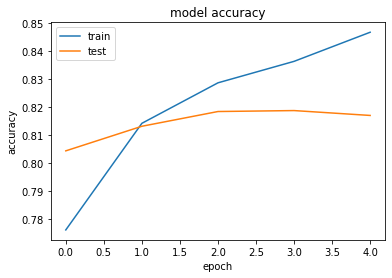

In [32]:
# Plotting the charts for model accuracy vs number of epochs

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

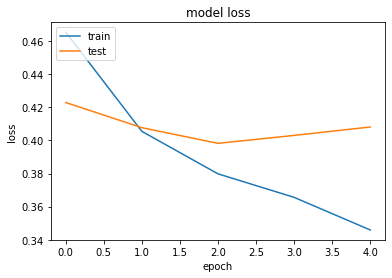

In [33]:
# Plotting the charts for loss vs the number of epochs

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### We have achieved 81.69 % accuracy on the test set, while utilizing only half of the given dataset, hence this accuracy can be further improved to greater than 90% if we use the complete dataset and train the model on more number of epochs.

### There were only 2 sentiments present in the training dataset, Positive and Negative, and our model is trained to only recognize either of them.

###  But we found out that there was another file mentioned in the links to the dataset. This file had a neutral sentiment attached to it along with the positive and negative sentiments.

###  We will try to see, how our model performs on this new type of sentiment, even though it has not been trained on such tweets.

In [35]:
# This function will convert the sentences to indices

def index_gen(sen_word, m_len):
    a = np.zeros((m_len))
    indices = []
    for j, k in enumerate(sen_word):
        try:
            index = word_index[k]
        except:
            k = last_word_embed(k)
            try:
                index = word_index[k]
            except:
                index = word_index['unk']
        a[j] = index
    return a

In [36]:
# This function converts the tweets so it can be fed to the model and gives out the prediction probabilities
# The Closer the probabilty is to 1, the sentiment is positive and the closer it is to 0, the sentiment will be negative.

def val_data(t):
    x = index_gen(clean_data(token.tokenize(t)), len_max)
    return classifier.predict(np.array([x])).item()

In [37]:
# Reading the dataset

df_val_raw = pd.read_csv('test.csv', sep=',', header=0, encoding = "ISO-8859-1")
df_val_raw.columns = ["polarity", "id", "date", "query", "user", "text"]
df_val_raw.head()

,polarity,id,date,query,user,text
0,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
1,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
2,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
3,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
4,4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite ha...


In [38]:
# Checking the number of sentiments in each category

#  0 = negative, 2 = neutral, 4 = positive

df_val_raw['polarity'].value_counts()

4    181
0    177
2    139
Name: polarity, dtype: int64

In [39]:
# Extracting only the required columns from the original dataset

df_val = df_val_raw[['polarity', 'text']]
df_val.head()

,polarity,text
0,4,Reading my kindle2... Love it... Lee childs i...
1,4,"Ok, first assesment of the #kindle2 ...it fuck..."
2,4,@kenburbary You'll love your Kindle2. I've had...
3,4,@mikefish Fair enough. But i have the Kindle2...
4,4,@richardebaker no. it is too big. I'm quite ha...


In [40]:
# Getting info about the dataset to see if there are any null values and checking the datatype of each column

df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   polarity  497 non-null    int64 
 1   text      497 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


In [41]:
# Creating a data array and extracting the values from the dataframe.

pred_polarity = []
val_tweet = df_val['text'].tolist()
val_sentiment = df_val['polarity'].tolist()

In [42]:
# As our model will not be able to make predictions for the Netural Sentiment, we have created a score range for the prediction
# probabilities. Where If the predicted probability score is less than 0.30 it will be considered a Negative Sentiment, if the
# score is greater than 0.70 it will be considered a Positive Sentiment and the score that falls in between will be considered 
# as Neutral sentiment.


for i in range(len(val_sentiment)):
    
    if val_data(val_tweet[i]) < 0.30:
        pred_polarity.append(0)
    elif val_data(val_tweet[i]) > 0.70:
        pred_polarity.append(4)
    else:
        pred_polarity.append(2)

In [43]:
# Reassigning the predicted polarities back to the dataset for a comparision.

df_val = df_val.assign(predicted_polarity = pred_polarity)

In [44]:
# Checking the dataset

df_val

,polarity,text,predicted_polarity
0,4,Reading my kindle2... Love it... Lee childs i...,4
1,4,"Ok, first assesment of the #kindle2 ...it fuck...",4
2,4,@kenburbary You'll love your Kindle2. I've had...,2
3,4,@mikefish Fair enough. But i have the Kindle2...,4
4,4,@richardebaker no. it is too big. I'm quite ha...,2
...,...,...,...
492,2,Ask Programming: LaTeX or InDesign?: submitted...,4
493,0,"On that note, I hate Word. I hate Pages. I hat...",0
494,4,Ahhh... back in a *real* text editing environm...,2
495,0,"Trouble in Iran, I see. Hmm. Iran. Iran so far...",0


In [45]:
# Making sure the appending is correct with no null values

df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   polarity            497 non-null    int64 
 1   text                497 non-null    object
 2   predicted_polarity  497 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 11.8+ KB


In [46]:
# Getting the accuracy score

print(accuracy_score(df_val['polarity'],df_val['predicted_polarity']))

0.579476861167002


In [47]:
# Getting the confusion matrix

print(confusion_matrix(df_val['polarity'],df_val['predicted_polarity']))

[[127  31  19]
 [ 24  36  79]
 [ 16  40 125]]


In [48]:
# Printing the classification report.

print(classification_report(df_val['polarity'],df_val['predicted_polarity']))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       177
           2       0.34      0.26      0.29       139
           4       0.56      0.69      0.62       181

    accuracy                           0.58       497
   macro avg       0.55      0.56      0.55       497
weighted avg       0.57      0.58      0.57       497



### From the classfication report it is evident that our model has performed good on the Positive and Negative sentiments.

###  But to our surprise, it has also predicted 34% of the Neutral sentiments correctly, for which it was not trained at all.

### It is only because of the neutral sentiment that the overall accuracy has decreased, which goes on to show that the model is a great fit for predicting the positive and negative sentiments on which it was trained.